In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
from sklearn.metrics import r2_score
import pprint

In [132]:
data = pd.read_csv("//Users/iainquinn/Crystalisation Internship/Data/DataRaw.csv")

In [114]:
data.head()

,Source,Molecule,SMILES,Method,Solvent 1,Solvent 1 mass fraction,Solvent 2,Solvent 2 mass fraction,Antisolvent,Antisolvent mass fraction,...,Solute concentration (mass solute/mass solvent mixture),Solubility (mass solute/mass solvent mixture),Supersaturation,induction_time,Standard Deviation (s),Growth Rate (m/s),Standard Deviation (m/s),Units for concentration in solution,Comments,Unnamed: 23
0,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,3.892554,2.935094,NaN,NaN,NaN,NaN,"Temperature, vessel & working volumeand agitat...",NaN
1,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,3.273095,4.000632,NaN,NaN,NaN,NaN,NaN,NaN
2,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,3.538031,4.001133,NaN,NaN,NaN,NaN,NaN,NaN
3,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,2.706836,3.998877,NaN,NaN,NaN,NaN,NaN,NaN
4,Beckmann_1999,Abecarnil,CC(C)OC(=O)C1=NC=C2C(=C1COC)C3=C(N2)C=CC(=C3)O...,Antisolvent,Isopropyl acetate,NaN,Methanol,NaN,Hexane,NaN,...,NaN,NaN,1.989765,5.947128,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 24 columns):
Source                                                     1531 non-null object
Molecule                                                   1531 non-null object
SMILES                                                     1459 non-null object
Method                                                     1531 non-null object
Solvent 1                                                  1240 non-null object
Solvent 1 mass fraction                                    209 non-null float64
Solvent 2                                                  420 non-null object
Solvent 2 mass fraction                                    95 non-null float64
Antisolvent                                                488 non-null object
Antisolvent mass fraction                                  23 non-null float64
Vessel Volume (mL)                                         1316 non-null float64
Operating  Volum

In [5]:
data["Molecule"].value_counts()

Paracetamol                                          370
Isonicotinamide                                      270
Ibuprofen                                            100
Glycine                                               93
Erythromycin ethylsuccinate                           63
Benzoic acid                                          63
Dexamethasone                                         63
Pozanicline                                           38
Abecarnil                                             31
m-Hydroxybenzoic acid                                 28
Butyl paraben                                         27
Cefodizime sodium                                     26
L-Histidine                                           26
Sodium orthovanadate                                  25
Sodium metaborate dihydrate                           23
Naproxen                                              22
Analgin (Metamizole sodium)                           21
Glucose                        

In [124]:
data['ln_induction_time'] = np.log(data['induction_time'])
data['ln_supersaturation'] = np.log(data['Supersaturation'])

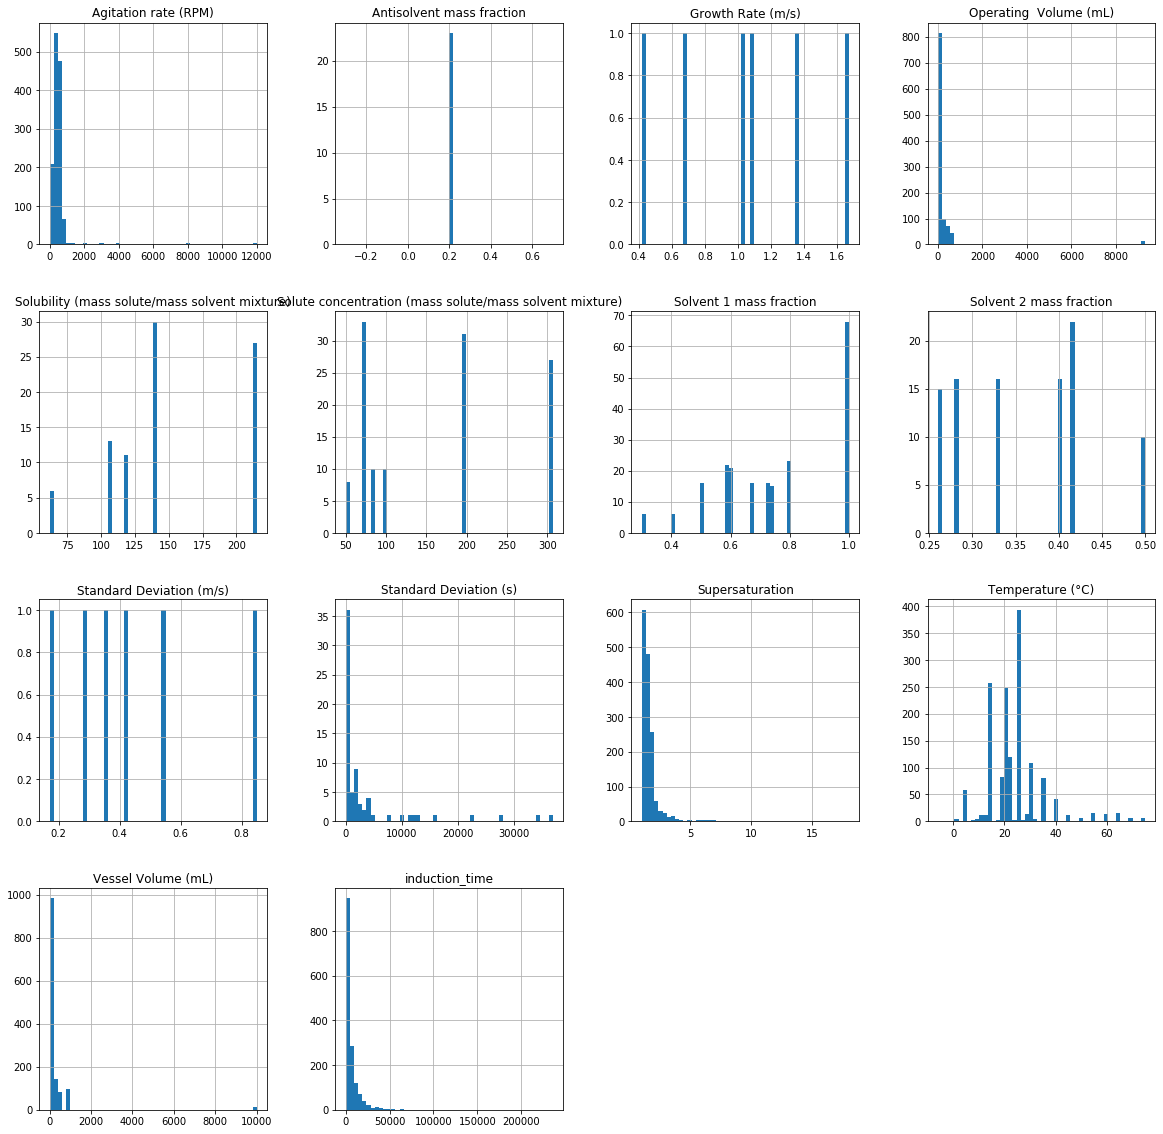

In [6]:
data.hist(bins=50, figsize=(20,20))
plt.show()

In [7]:
data_paracetamol= data.loc[data.Molecule == 'Paracetamol']

In [22]:
data_antisolvent = data.loc[data.Method == "Antisolvent"]
data_cooling = data.loc[data.Method == "Cooling"]

In [133]:
molecule_list = data.Molecule.unique()
print(molecule_list)
molecule_list_antisolvent = data_antisolvent.Molecule.unique()
print(molecule_list_antisolvent)
molecule_list_cooling = data_cooling.Molecule.unique()
print(molecule_list_cooling)
source_list = data.Source.unique()
print(source_list)
solvent_list= data.solvent.unique()
print(solvent_list)

['Abecarnil' 'ABT-089' 'Ammonium aluminum sulfate dodecahydrate '
 'Benzoic acid ' 'Butyl paraben' 'm- Hydroxybenzoic Acid'
 'Cefodizime sodium' 'Cefuroxime Sodium'
 'Cytidine 5-monophosphate disodium salt (5-CMPNa7)' 'Dexamethasone '
 'Erythromycin ethylsuccinate ' 'Glycine ' 'L-Histidine'
 'm-Hydroxybenzoic acid' 'Naproxen' 'p-aminobenzoic acid, PABA'
 'Paracetamol' 'Potash Alum' 'Salicylic acid ' 'Sodium Chloride '
 'Sodium metaborate dihydrate' 'Sodium molybdate' 'Sodium orthovanadate'
 'Isonicotinamide ' 'Glutamic acid ' 'Glucose ' 'L-asparagine monohydrate'
 'Ibuprofen' 'Diprophylline ' 'Analgin (Metamizole sodium)'
 'Potassium sulphate ' 'Borax decahydrate ' 'Sodium chlorate '
 'Pozanicline']
['Abecarnil' 'Benzoic acid ' 'Cefodizime sodium' 'Cefuroxime Sodium'
 'Dexamethasone ' 'Erythromycin ethylsuccinate ' 'Glycine ' 'L-Histidine'
 'Naproxen' 'Paracetamol' 'Potash Alum' 'Salicylic acid '
 'Sodium Chloride ' 'Isonicotinamide ']
['ABT-089' 'Ammonium aluminum sulfate dodecahydrat

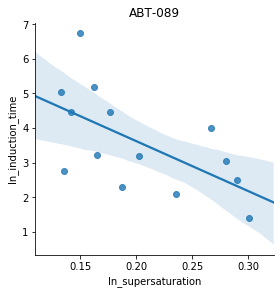

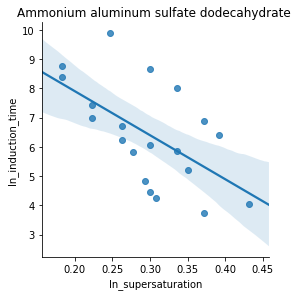

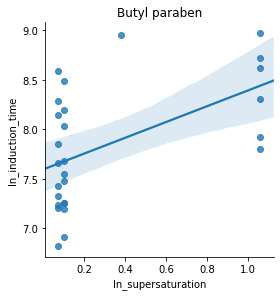

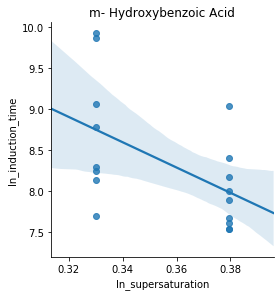

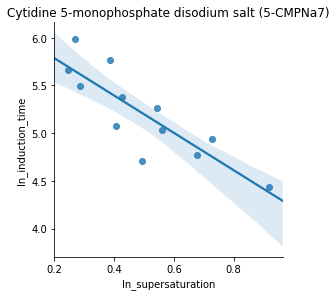

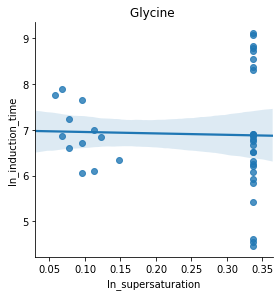

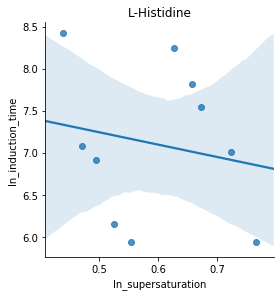

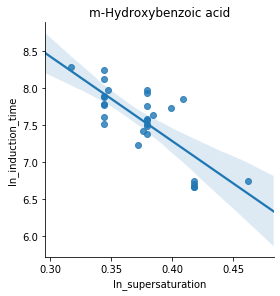

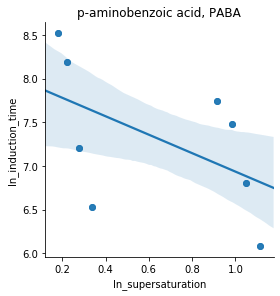

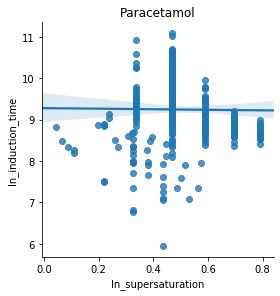

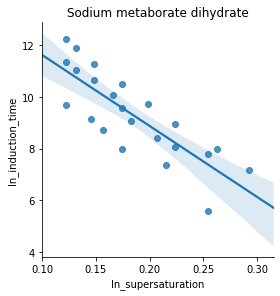

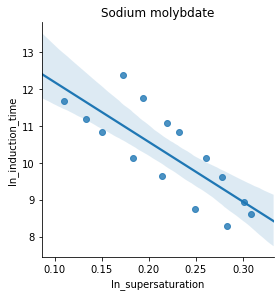

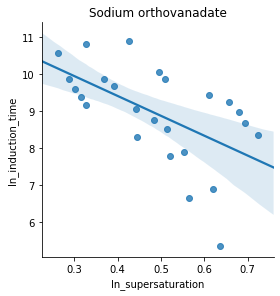

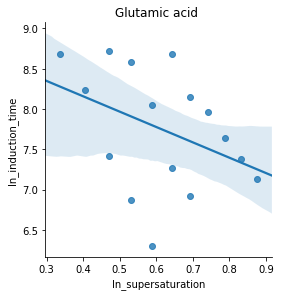

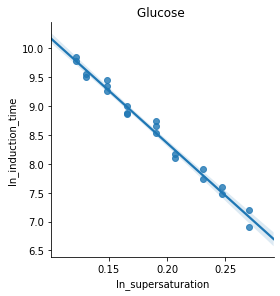

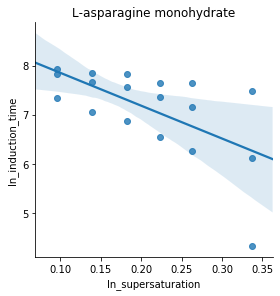

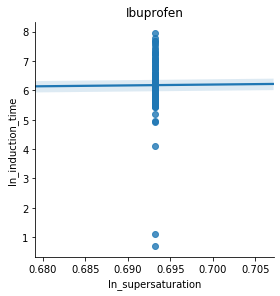

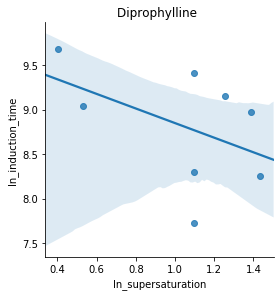

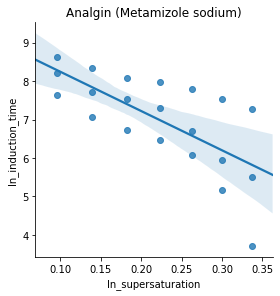

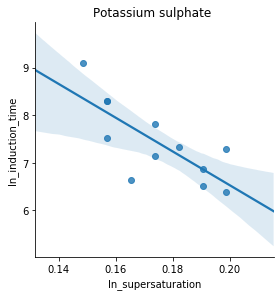

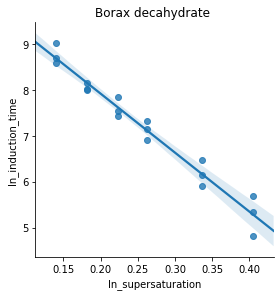

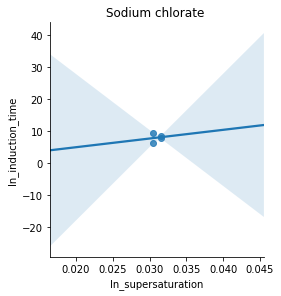

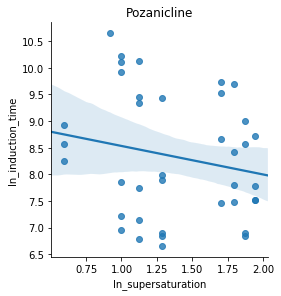

In [31]:
for molecule in molecule_list_cooling:
    plot = sns.lmplot(y=("ln_induction_time"), x=("ln_supersaturation"), height=(4),
               data=data_cooling.loc[data_cooling.Molecule == molecule]).set(title=molecule)
    plot.savefig("/Users/iainquinn/Crystalisation Internship/Cooling Figs/" + molecule +'.png')

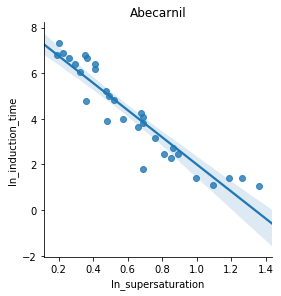

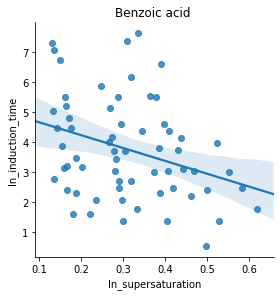

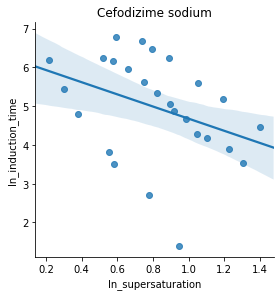

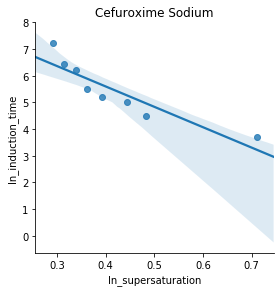

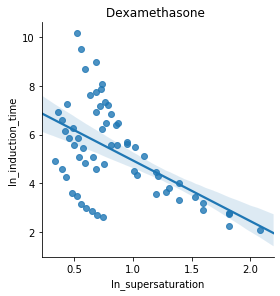

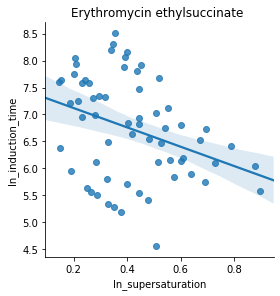

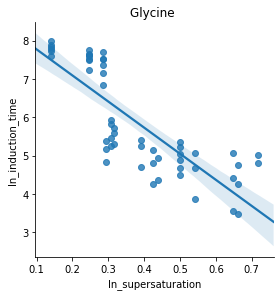

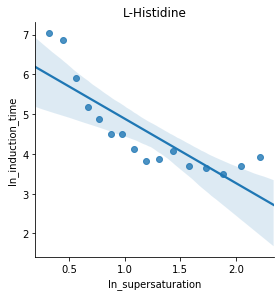

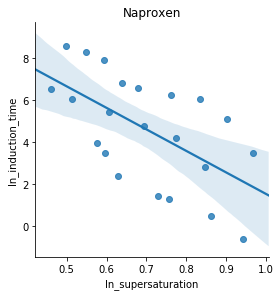

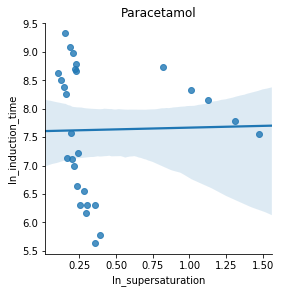

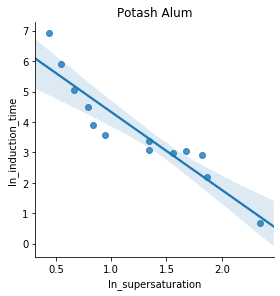

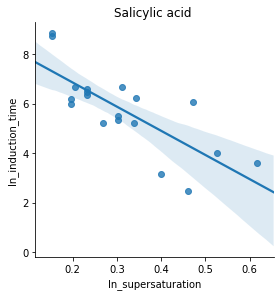

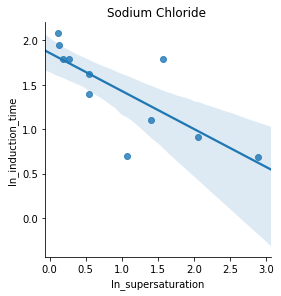

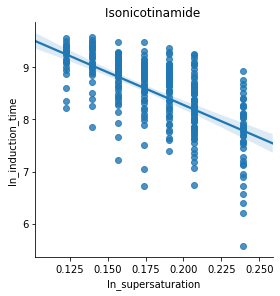

In [33]:
for molecule in molecule_list_antisolvent:
    plot = sns.lmplot(y=("ln_induction_time"), x=("ln_supersaturation"), height=(4),
               data=data_antisolvent.loc[data_antisolvent.Molecule == molecule]).set(title=molecule)
    plot.savefig("/Users/iainquinn/Crystalisation Internship/Antisolvent Figs/" + molecule +'.png')

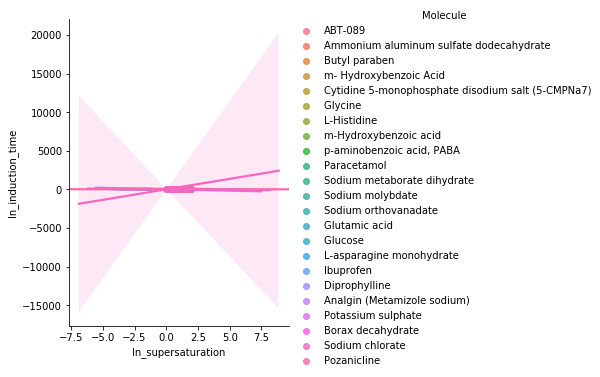

In [16]:
sns.lmplot(y=("ln_induction_time"), x=("ln_supersaturation"), hue=("Molecule"), data=data_antisolvent)

In [52]:
r2_score_antisolvent={}
for molecule in molecule_list_antisolvent:
    data_set=data_antisolvent.loc[data_antisolvent.Molecule == molecule]
    Y = np.c_[data_set["ln_induction_time"]]
    X = np.c_[data_set["ln_supersaturation"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    score = r2_score(Y, prediction)
    r2_score_antisolvent[molecule] = score
    
pprint.pprint(r2_score_antisolvent)

{'Abecarnil': 0.880549776281924,
 'Benzoic acid ': 0.10559085861322626,
 'Cefodizime sodium': 0.13265633132494659,
 'Cefuroxime Sodium': 0.8253762416438547,
 'Dexamethasone ': 0.2921973525640311,
 'Erythromycin ethylsuccinate ': 0.11774104217512227,
 'Glycine ': 0.671834684072053,
 'Isonicotinamide ': 0.37854530679146026,
 'L-Histidine': 0.6994498359173879,
 'Naproxen': 0.3541623716440693,
 'Paracetamol': 0.00044476033352125466,
 'Potash Alum': 0.8709180404352491,
 'Salicylic acid ': 0.6028803792180661,
 'Sodium Chloride ': 0.5916693449230399}


In [53]:
data_q = {'method':[], 'molecule' : [], 'slope':[], 'intercept':[], 'r2':[]}
df = pd.DataFrame(data_q, columns=['method','molecule','slope', 'intercept', 'r2'])

In [54]:
df.head()

,method,molecule,slope,intercept,r2


In [76]:
method=[]
score=[]
slope=[]
intercept=[]
molecules=[]

for molecule in molecule_list_antisolvent:
    data_set=data_antisolvent.loc[data_antisolvent.Molecule == molecule]
    Y = np.c_[data_set["ln_induction_time"]]
    X = np.c_[data_set["ln_supersaturation"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    method.append("antisolvent")
    molecules.append(molecule)
    score.append(r2_score(Y, prediction))
    slope.append(float(model.coef_))
    intercept.append(float(model.intercept_))

In [77]:
df = pd.DataFrame(list(zip(method, molecules, slope, intercept, score)) , columns=['method','molecule','slope', 'intercept', 'r2'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
method       14 non-null object
molecule     14 non-null object
slope        14 non-null float64
intercept    14 non-null float64
r2           14 non-null float64
dtypes: float64(3), object(2)
memory usage: 688.0+ bytes


In [81]:
df.head()

,method,molecule,slope,intercept,r2
0,antisolvent,Abecarnil,-5.942649,7.943178,0.880550
1,antisolvent,Benzoic acid,-4.262254,5.079579,0.105591
2,antisolvent,Cefodizime sodium,-1.566961,6.244680,0.132656
3,antisolvent,Cefuroxime Sodium,-7.645865,8.658110,0.825376
4,antisolvent,Dexamethasone,-2.491261,7.430646,0.292197


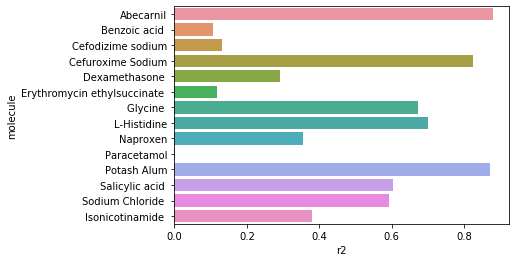

In [111]:
sns.barplot(y="molecule", x="r2", data=df)

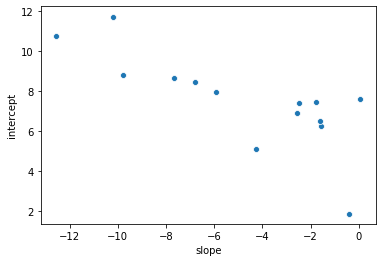

In [99]:
sns.scatterplot(data=df, x="slope", y="intercept")

In [101]:
new_df=df.loc[df.r2 > 0.5]

In [102]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 12
Data columns (total 5 columns):
method       7 non-null object
molecule     7 non-null object
slope        7 non-null float64
intercept    7 non-null float64
r2           7 non-null float64
dtypes: float64(3), object(2)
memory usage: 336.0+ bytes


In [103]:
new_df.head()

,method,molecule,slope,intercept,r2
0,antisolvent,Abecarnil,-5.942649,7.943178,0.880550
3,antisolvent,Cefuroxime Sodium,-7.645865,8.658110,0.825376
6,antisolvent,Glycine,-6.808545,8.449834,0.671835
7,antisolvent,L-Histidine,-1.614020,6.498207,0.699450
10,antisolvent,Potash Alum,-2.561611,6.888226,0.870918


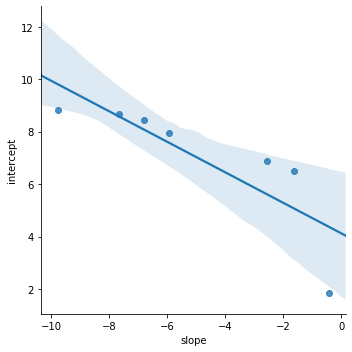

In [105]:
sns.lmplot(data=new_df, x="slope", y="intercept")

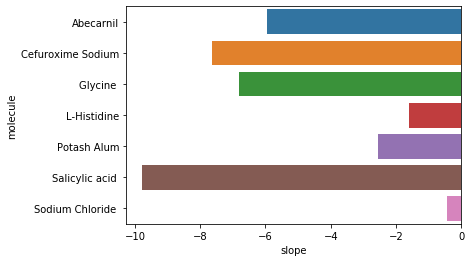

In [110]:
sns.barplot(y="molecule", x="slope", data=new_df)

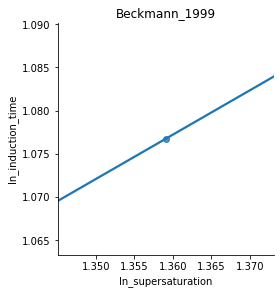

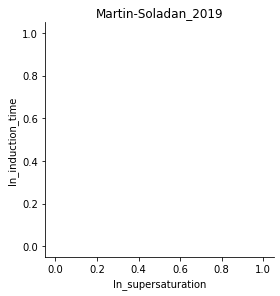

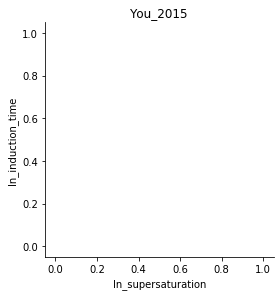

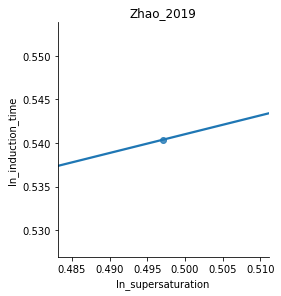

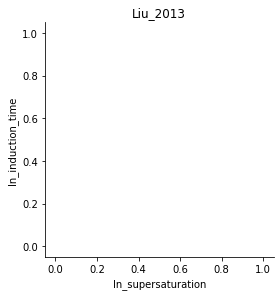

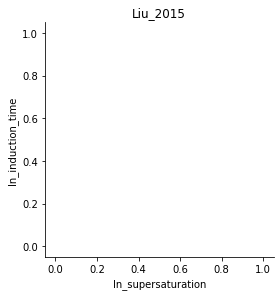

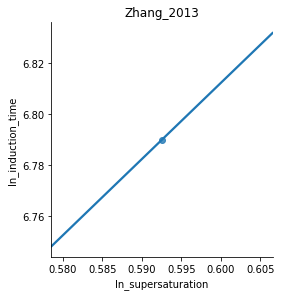

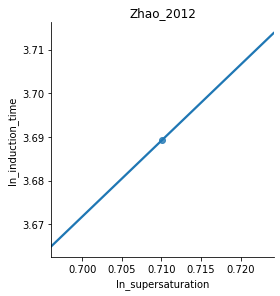

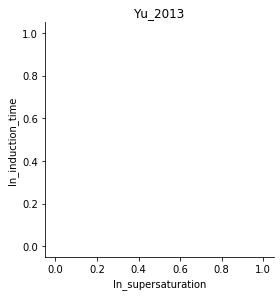

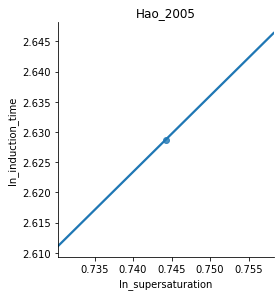

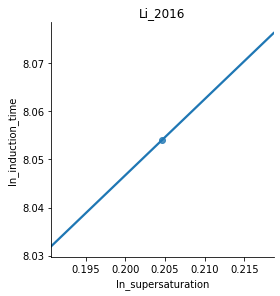

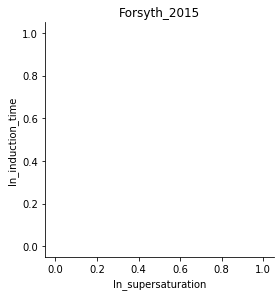

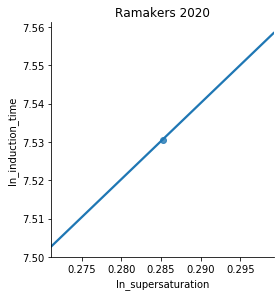

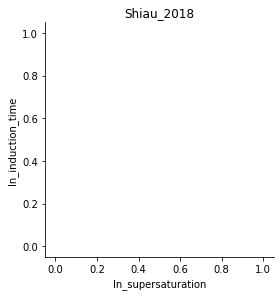

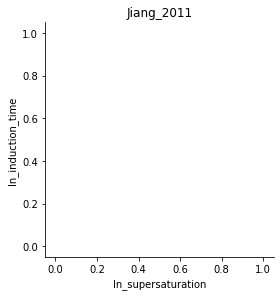

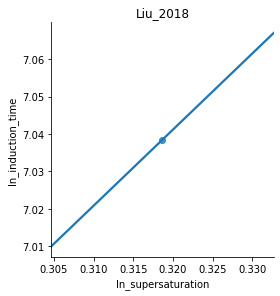

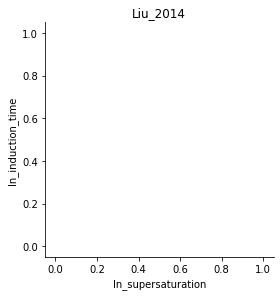

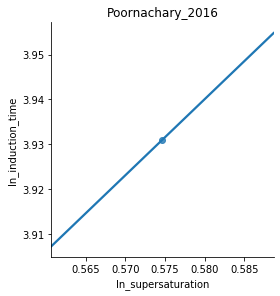

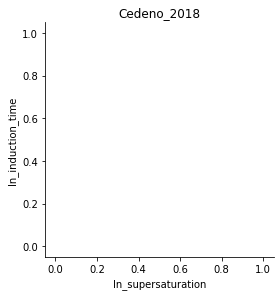

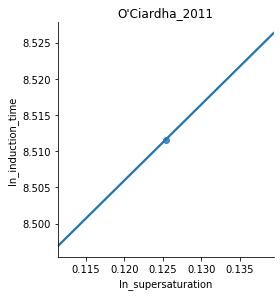

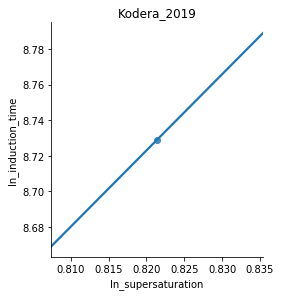

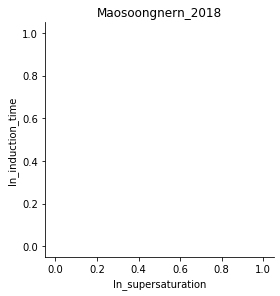

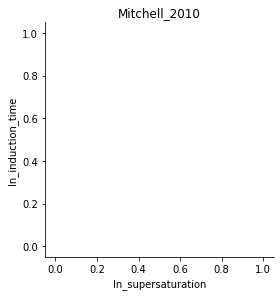

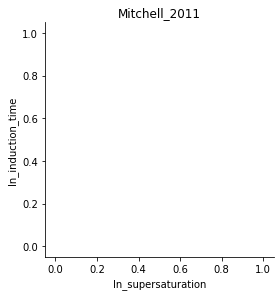

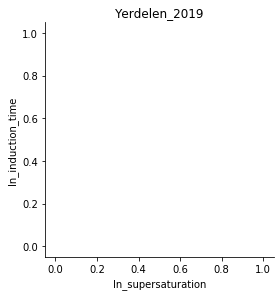

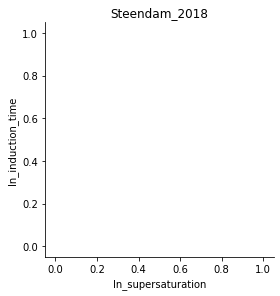

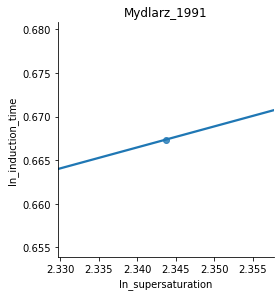

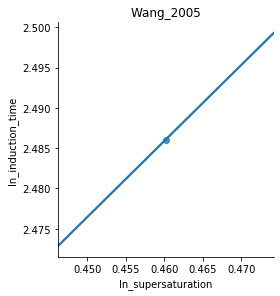

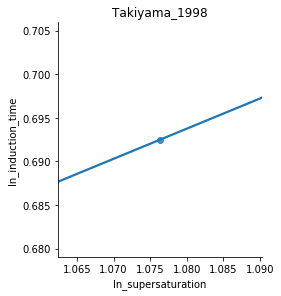

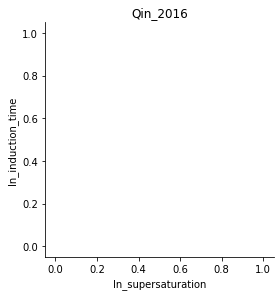

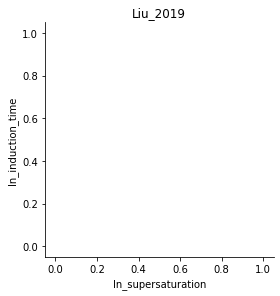

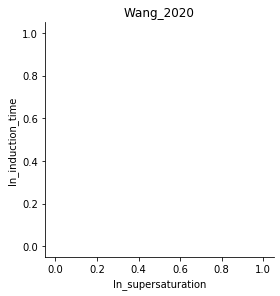

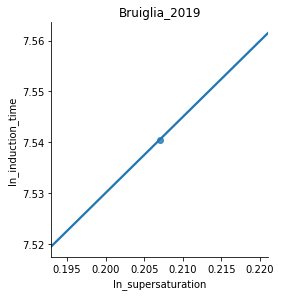

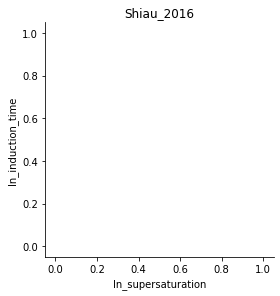

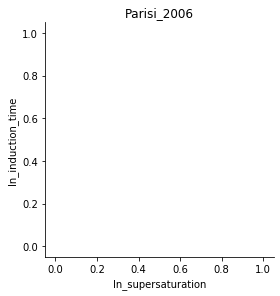

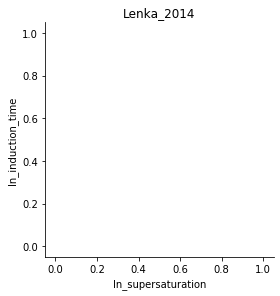

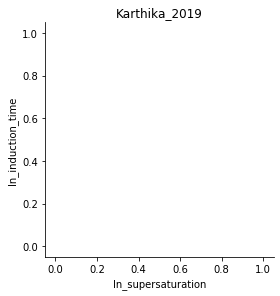

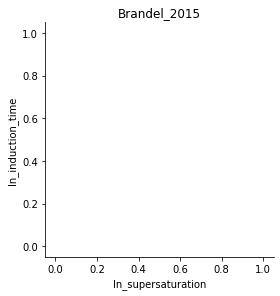

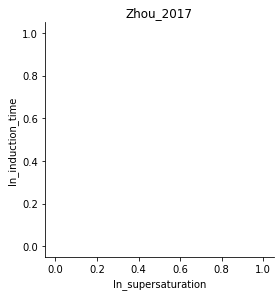

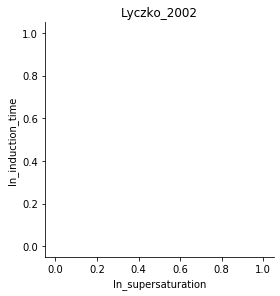

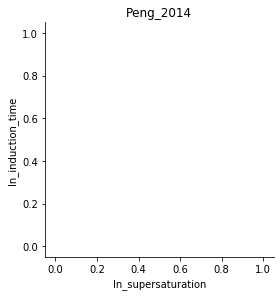

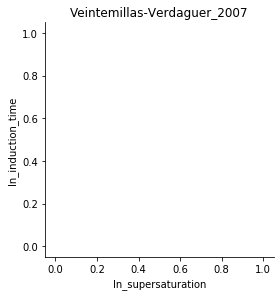

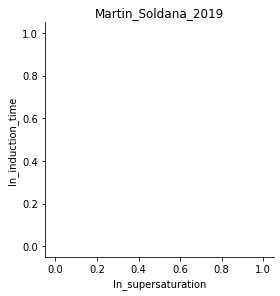

In [126]:
for source in source_list:
    plot = sns.lmplot(y=("ln_induction_time"), x=("ln_supersaturation"), height=(4),
               data=data_antisolvent.loc[data_antisolvent.Source == source]).set(title=source)

In [130]:
len(molecule_list_cooling)

23